<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 3: Practical - Logistic Regression <br> <br>
<font color=686880 size=4>
    TAs: Ali Salesi - Alireza Dehghanpour - Arman Malekzadeh
    
____

### Full Name : Kian Omoomi
### Student Number : 98110062
### Colab Link: https://colab.research.google.com/drive/1_kds31VWnbGsL1VVGwpN1Cf5CJ0m6UBZ?usp=sharing
___

## 1. Introduction (10 points)
The datasets consist of several medical predictor(independent) variables and one target (dependent) variable, "Outcome". Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
  * Pregnancies
  * Glucose
  * BloodPressure
  * SkinThickness
  * Insulin
  * BMI
  * DiabetesPedigreeFunction
  * Age


First, we perform some data exploration to get a better understanding of the data. Then, we perform some data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!wget https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv

--2023-05-05 17:56:27--  https://github.com/sharif-ml/sharif-ml.github.io/raw/main/assignments/diabet-train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv [following]
--2023-05-05 17:56:27--  https://raw.githubusercontent.com/sharif-ml/sharif-ml.github.io/main/assignments/diabet-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20859 (20K) [text/plain]
Saving to: ‘diabet-train.csv’

diabet-train.csv    100%[===================>]  20.37K  --.-KB/s    in 0s      

2023-05-05 17:56:27 (90.5 MB/s) - ‘diabet-train.csv’ saved

TODO: Load the dataset as a dataframe. Then, check for any null values. Remove the rows containing them. Finally, display the first 10 rows.

In [5]:
df = pd.read_csv('diabet-train.csv')
df = df.dropna()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


TODO: Calculate the mean, standard deviation, min and max value for each column.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.818314,120.399709,68.816860,20.437500,79.325581,31.862500,0.475683,33.138081,0.343023
std,3.359206,32.335016,19.412061,15.998604,115.199903,7.945238,0.338147,11.828338,0.475065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.075000,0.239750,24.000000,0.000000
50%,3.000000,116.000000,71.000000,23.000000,36.000000,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.425000,0.632500,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Data Exploration (10 points)
In this section, we perform some data exploration to get a better understanding of the data.
First, we draw heatmaps to see the correlation between the features.
Then we draw pairplots to see the distribution of the features.

TODO: Draw a heatmap based on the correlation between the features (hint: you can use `seaborn`)

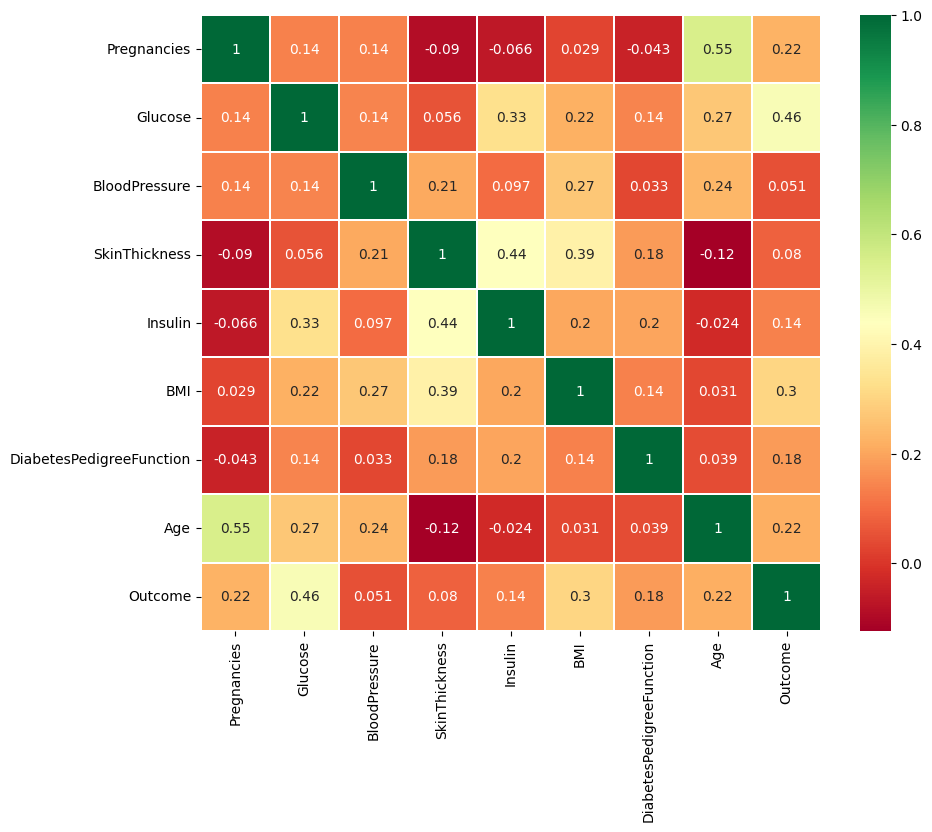

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

TODO: Draw the pairplot associated with the dataframe using `seaborn`.

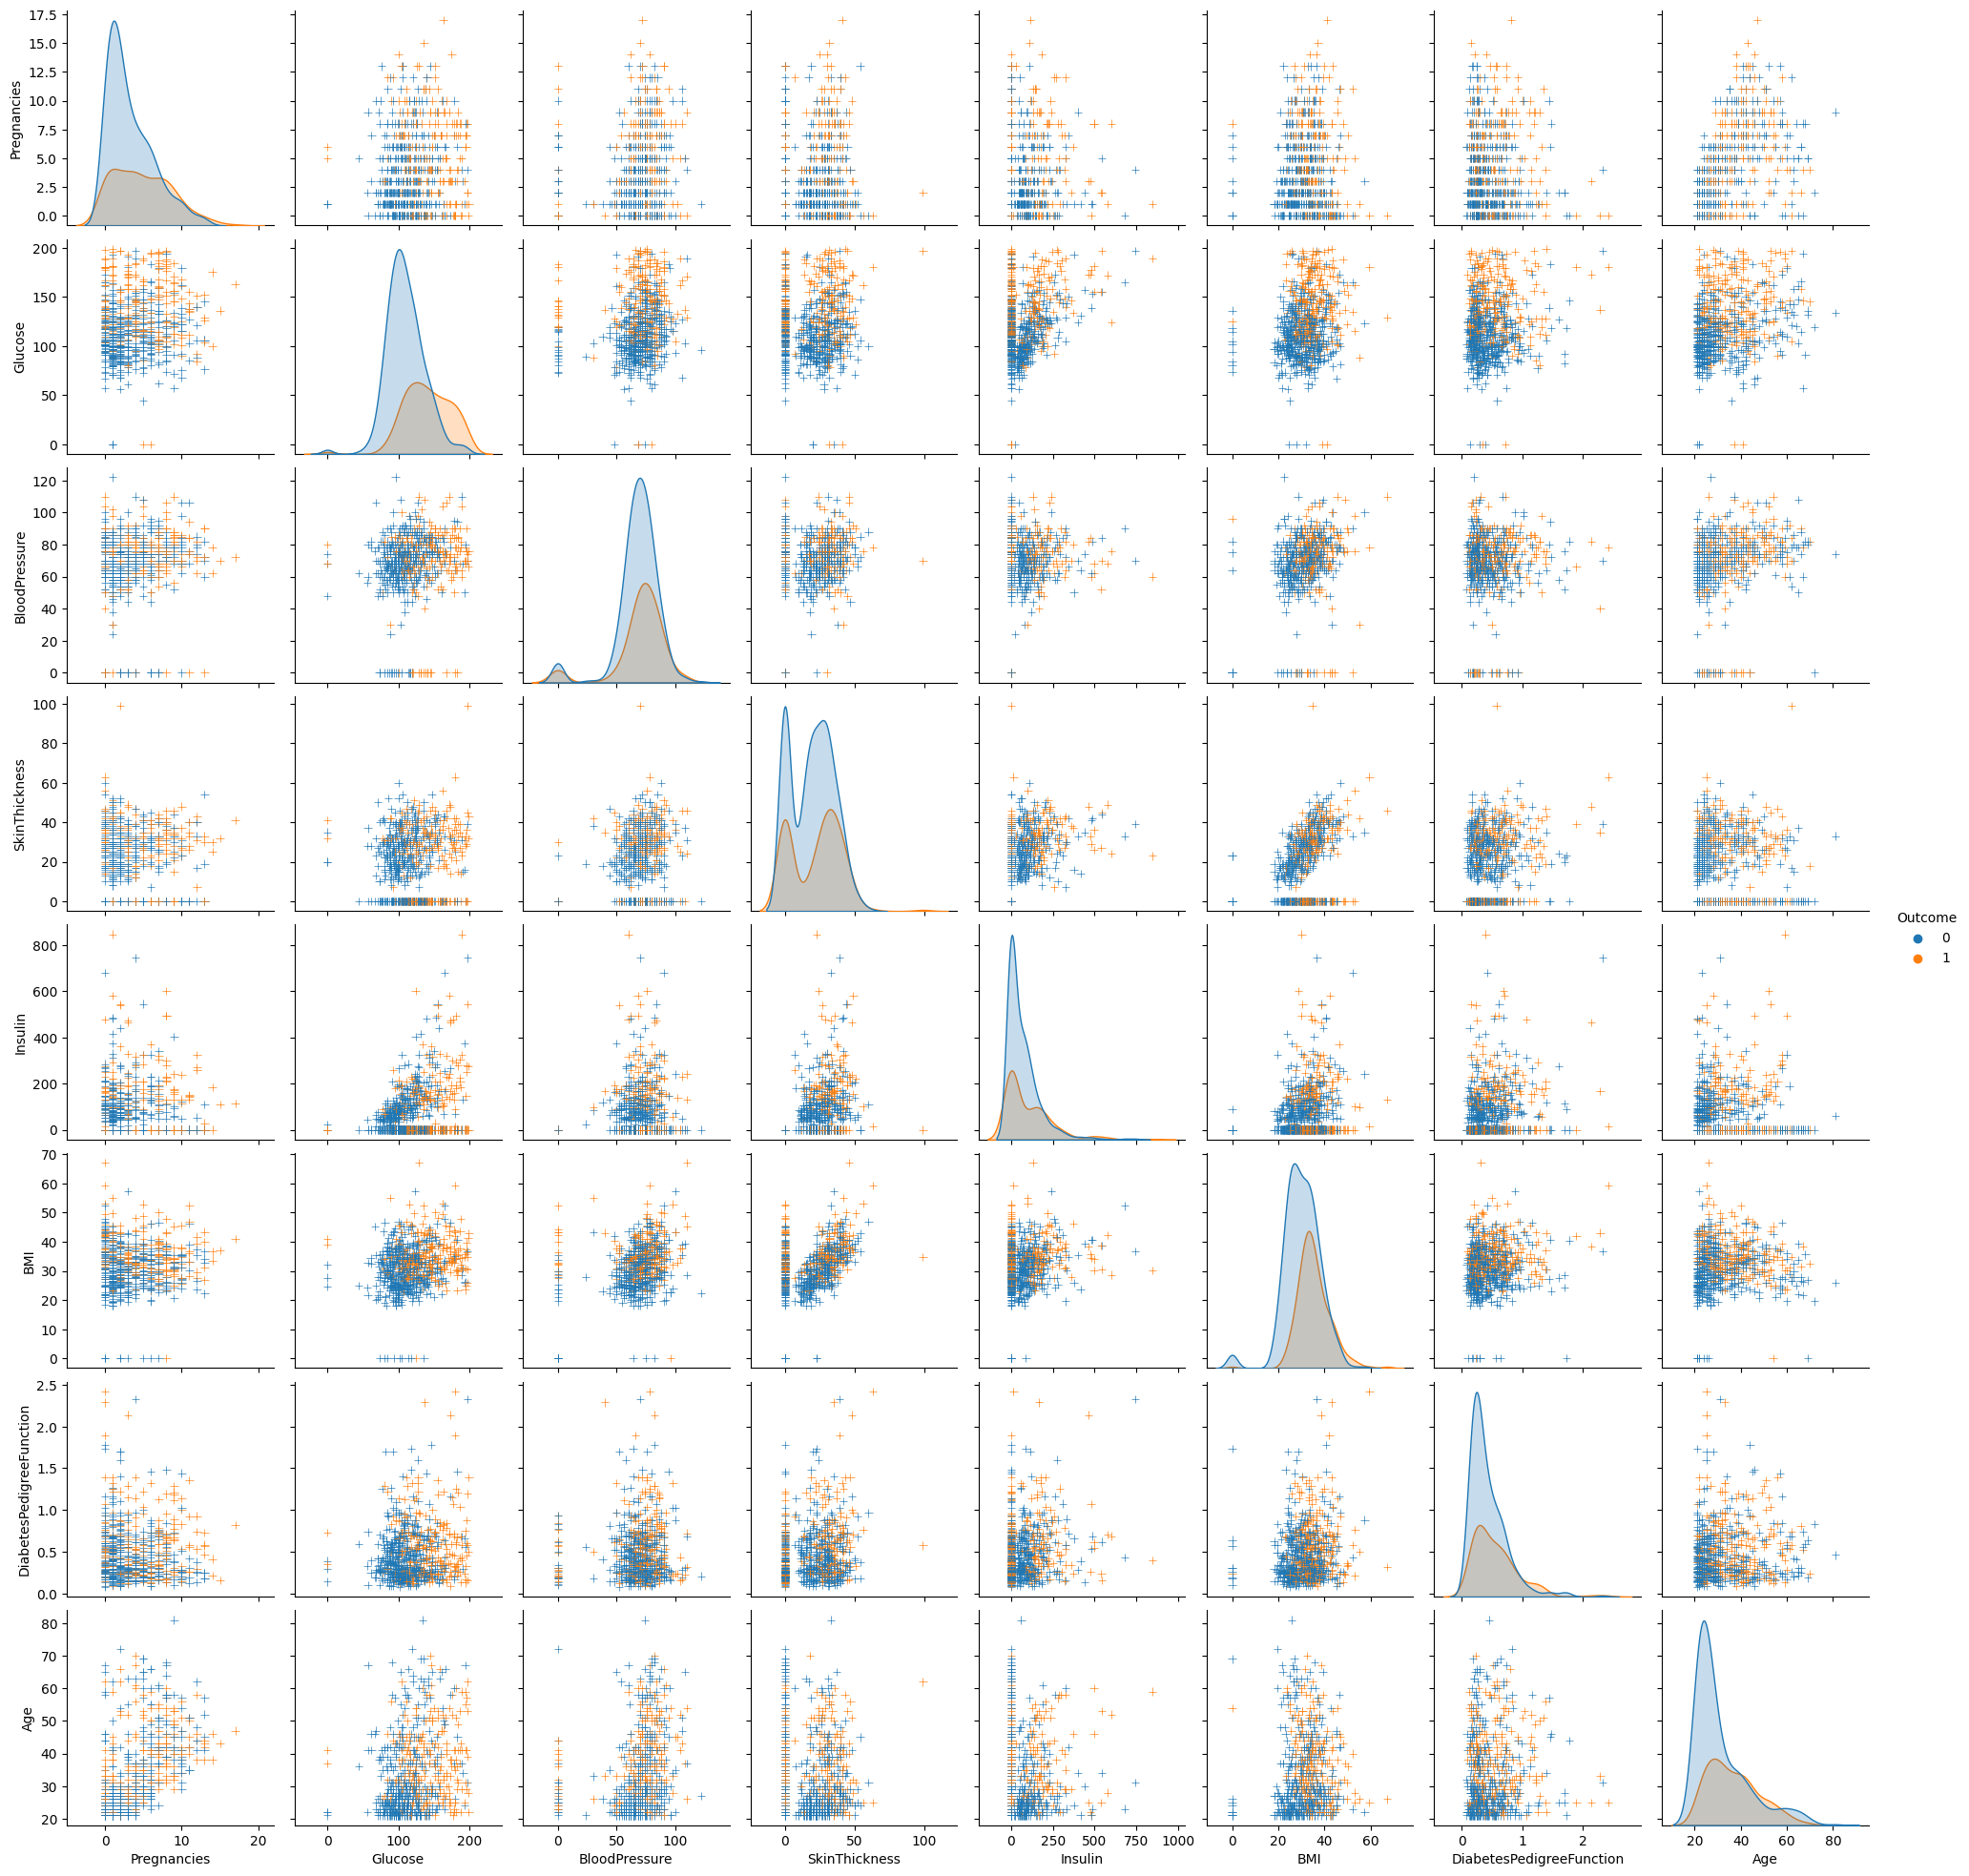

In [8]:
sns.pairplot(df, hue='Outcome', markers='+')
plt.show()

## 3. SKLearn Regression Model (15 points)

### 3.1 Logistic Regression
In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn`. Use 20% of the data for the testing phase, and the remaining for the training phase.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [10]:
from sklearn.metrics import confusion_matrix
predictions = logmodel.predict(X_test)
confusion_matrix(y_test, predictions)

array([[76, 10],
       [29, 23]])

## 4. Custom Regression Model (30 points)
First, we define base model for regression model.

### 4.1 Gradient Descent Logistic Regression Model

In [11]:
## DO NOT CHANGE THE CONTENTS OF THIS CELL

from abc import ABC, abstractmethod


class BaseModel(ABC):
    def __init__(self, n_features):
        self.N = n_features
        self.beta = np.zeros((self.N+1,))

    @abstractmethod
    def fit(self, X_train, y_train):
        raise NotImplementedError('must override fit')

    @abstractmethod
    def predict(self, X_test):
        raise NotImplementedError('must override predict')

In [21]:
class GDModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum
        self.losses = []


    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    @abstractmethod
    def loss_derivative(self, X, y):
        raise NotImplementedError("must override loss derivative")

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate(
            (X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            loss = self.loss(X_train_new, y_train)
            self.losses.append(loss)
            if abs(loss - last_loss) < self.tol:
                break
            last_loss = loss
            dl = self.loss_derivative(X_train_new, y_train) + self.momentum * momentum
            momentum = dl
            self.beta = self.beta - self.lr * dl

TODO: Imeplement the Logistic Regression model. For this class, the only things you have to change are the definitions of the following functions: `loss`, `loss_derivative`, and `predict`. 
<br>
Note: Some basic explanations about the concept of "gradient descent" will be given to you in a TA session very soon. However, completing this task doesn't necessarily depend on being familiar with that concept.

In [22]:
class GDLogisticRegression(GDModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = np.random.normal(0, 1/np.sqrt(self.N), (self.N+1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        z = np.dot(X, self.beta)
        y_hat = self.sigmoid(z)
        loss = np.sum(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
        return loss

    def loss_derivative(self, X, y):
        z = np.dot(X, self.beta)
        y_hat = self.sigmoid(z)
        dl = np.dot(X.T, y_hat - y)
        return dl

    def predict(self, X):
        X_new = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        z = np.dot(X_new, self.beta)
        y_pred = self.sigmoid(z)
        return (y_pred > 0.5).astype(int)


TODO: Implement the Logistic Regression Model. This time, use Pytorch!

In [25]:
# DO NOT CHANGE THE CONTENT OF THIS CELL

import torch

class GDTorchModel(BaseModel):
    def __init__(self, n_features, max_iter=50000, init_lr=0.0001):
        super().__init__(n_features)
        self.max_iter = max_iter
        self.init_lr = init_lr
        self.optimizer = None
        self.scheduler = None

    @abstractmethod
    def loss(self, X, y):
        raise NotImplementedError("must override loss")

    def fit(self, X_train, Y_train):
        X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
        X_train = torch.from_numpy(X_train).float()
        Y_train = torch.from_numpy(Y_train).float()
        for _ in range(self.max_iter):
            loss = self.loss(X_train, Y_train)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            self.scheduler.step(loss)

Note: Just change the definitions of `loss` and `predict`.

In [26]:
import torch.nn as nn

class GDTorchLogisticRegression(GDTorchModel):
    def __init__(self, n_features, **kwargs):
        super().__init__(n_features, **kwargs)
        self.beta = torch.randn(self.N+1, requires_grad=True)
        self.optimizer = torch.optim.Adam([self.beta], lr=0.01)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=1000, factor=0.5)

    def loss(self, X, y):
        return nn.BCELoss()(torch.sigmoid(torch.matmul(X, self.beta)), y)
    
    def predict(self, X_test):
        X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
        X_test = torch.from_numpy(X_test).float()
        return (torch.sigmoid(torch.matmul(X_test, self.beta)).detach().numpy() > 0.5).astype(int)


TODO: Predict the "Outcome" for the testing samples using all of the models (the one you trained using `sklearn` and the other ones for which you used your own code).

In [49]:
sk_pred = predictions

custom_model = GDLogisticRegression(X_train.shape[1])
custom_model.fit(X_train, y_train)
custom_pred = custom_model.predict(X_test)


pytorch_model = GDTorchLogisticRegression(X_train.shape[1])
pytorch_model.fit(X_train, y_train)
pytorch_pred = pytorch_model.predict(torch.from_numpy(X_test).float())

<ipython-input-22-622126f5b3f4>:12: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
<ipython-input-22-622126f5b3f4>:12: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
<ipython-input-22-622126f5b3f4>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


# Evaluation (20 points)

TODO: Calculate `precision`, `recall`, and `f1-score`, and the `confusion_matrix` using your own code. Do this for the predictions given by both of the models.

In [28]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        '''
        Parameters:
            y_true : 1d array-like, or label indicator array
                    Ground truth (correct) target values.
            y_pred : 1d array-like, or label indicator array
                    Estimated targets as returned by a classifier.

        '''
        self.y_true = y_true
        self.y_pred = y_pred
    
    def f1_score(self):
        '''
        Returns:
            f1: the f1-score calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        precision_class_0 = 0
        for i in range(len(self.y_pred)):
            if self.y_true[i] == 0 and self.y_pred[i] == 0:
                precision_class_0 += 1
        precision_class_0 /= len(list(filter(lambda x: x == 0, self.y_pred)))

        recall_class_0 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 0 and self.y_pred[i] == 0:
                recall_class_0 += 1
        recall_class_0 /= len(list(filter(lambda x: x == 0, self.y_true)))

        f1_class_0 = 2 * precision_class_0 * recall_class_0 / (precision_class_0 + recall_class_0)

        precision_class_1 = 0
        for i in range(len(self.y_pred)):
            if self.y_true[i] == 1 and self.y_pred[i] == 1:
                precision_class_1 += 1
        precision_class_1 /= len(list(filter(lambda x: x == 1, self.y_pred)))

        recall_class_1 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 1 and self.y_pred[i] == 1:
                recall_class_1 += 1
        recall_class_1 /= len(list(filter(lambda x: x == 1, self.y_true)))

        f1_class_1 = 2 * precision_class_1 * recall_class_1 / (precision_class_1 + recall_class_1)

        f1 = (f1_class_0 + f1_class_1) / 2
        return f1

        
        

    def precision(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        precision_class_0 = 0
        for i in range(len(self.y_pred)):
            if self.y_true[i] == 0 and self.y_pred[i] == 0:
                precision_class_0 += 1
        precision_class_0 /= len(list(filter(lambda x: x == 0, self.y_pred)))
        precision_class_1 = 0
        for i in range(len(self.y_pred)):
            if self.y_true[i] == 1 and self.y_pred[i] == 1:
                precision_class_1 += 1
        precision_class_1 /= len(list(filter(lambda x: x == 1, self.y_pred)))
        precision = (precision_class_0 + precision_class_1) / 2
        return precision


    def recall(self):
        '''
        Returns:
            precision: the precision calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        recall_class_0 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 0 and self.y_pred[i] == 0:
                recall_class_0 += 1
        recall_class_0 /= len(list(filter(lambda x: x == 0, self.y_true)))
        recall_class_1 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 1 and self.y_pred[i] == 1:
                recall_class_1 += 1
        recall_class_1 /= len(list(filter(lambda x: x == 1, self.y_true)))
        recall = (recall_class_0 + recall_class_1) / 2
        return recall


    def confusion_matrix(self):
        '''
        Returns:
            precision: the confusion matrix calculated based on "y_true" and "y_pred". 
        Note: You should first calculate this value for each class, and then
             use the secondary values for calculating the "macro" average.
        '''
        # 0 is negative class, 1 is positive class

        TP_class_0 = 0
        TN_class_0 = 0
        FP_class_0 = 0
        FN_class_0 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 0 and self.y_pred[i] == 0:
                TN_class_0 += 1
            elif self.y_true[i] == 0 and self.y_pred[i] == 1:
                FP_class_0 += 1
            elif self.y_true[i] == 1 and self.y_pred[i] == 0:
                FN_class_0 += 1
            elif self.y_true[i] == 1 and self.y_pred[i] == 1:
                TP_class_0 += 1

        TP_class_1 = 0
        TN_class_1 = 0
        FP_class_1 = 0
        FN_class_1 = 0
        for i in range(len(self.y_true)):
            if self.y_true[i] == 1 and self.y_pred[i] == 1:
                TP_class_1 += 1
            elif self.y_true[i] == 1 and self.y_pred[i] == 0:
                FN_class_1 += 1
            elif self.y_true[i] == 0 and self.y_pred[i] == 1:
                FP_class_1 += 1
            elif self.y_true[i] == 0 and self.y_pred[i] == 0:
                TN_class_1 += 1


        TP = TP_class_0 + TP_class_1 / 2
        TN = TN_class_0 + TN_class_1 / 2
        FP = FP_class_0 + FP_class_1 / 2
        FN = FN_class_0 + FN_class_1 / 2
        return np.array([[TP, FN], [FP, TN]])

In [50]:
sk_report = classification_full_report(list(y_test), sk_pred)
sk_precision = sk_report.precision()
sk_recall = sk_report.recall()
sk_f1 = sk_report.f1_score()
sk_confusion_matrix = sk_report.confusion_matrix()
print(f"sk_precision is {sk_precision}")
print(f"sk_recall is {sk_recall}")
print(f"sk_f1_score is {sk_f1}")
print(f"sk_confusion_matrix is:\n {sk_confusion_matrix}")

sk_precision is 0.7103896103896103
sk_recall is 0.6630143112701252
sk_f1_score is 0.6684939944564214
sk_confusion_matrix is:
 [[ 34.5  43.5]
 [ 15.  114. ]]


In [51]:
custom_report = classification_full_report(list(y_test), custom_pred)
custom_precision = custom_report.precision()
custom_recall = custom_report.recall()
custom_f1 = custom_report.f1_score()
custom_confusion_matrix = custom_report.confusion_matrix()
print(f"custom_precision is {custom_precision}")
print(f"custom_recall is {custom_recall}")
print(f"custom_f1_score is {custom_f1}")
print(f"custom_confusion_matrix is:\n {custom_confusion_matrix}")

custom_precision is 0.6915584415584416
custom_recall is 0.6319320214669052
custom_f1_score is 0.5367121507472385
custom_confusion_matrix is:
 [[75.  3.]
 [90. 39.]]


In [52]:
pytorch_report = classification_full_report(list(y_test), pytorch_pred)
pytorch_precision = pytorch_report.precision()
pytorch_recall = pytorch_report.recall()
pytorch_f1 = pytorch_report.f1_score()
pytorch_confusion_matrix = pytorch_report.confusion_matrix()
print(f"pytorch_precision is {pytorch_precision}")
print(f"pytorch_recall is {pytorch_recall}")
print(f"pytorch_f1_score is {pytorch_f1}")
print(f"pytorch_confusion_matrix is:\n {pytorch_confusion_matrix}")

pytorch_precision is 0.7303030303030302
pytorch_recall is 0.6784436493738819
pytorch_f1_score is 0.6854943024330151
pytorch_confusion_matrix is:
 [[ 36.   42. ]
 [ 13.5 115.5]]


# Finding the right Threshold (15 points)

TODO: Plot the "Precision-Recall Curve".

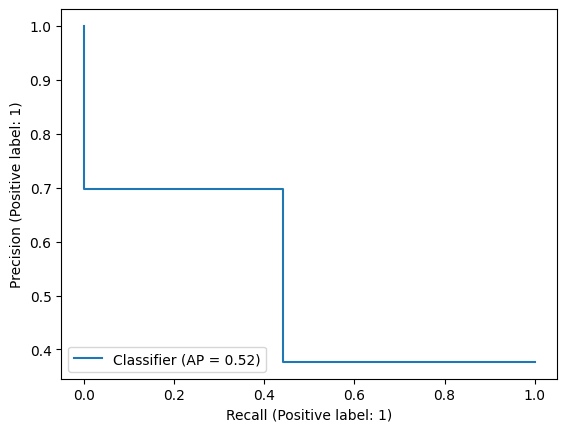

In [53]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
plot = PrecisionRecallDisplay.from_predictions(y_test, sk_pred)
plt.show()

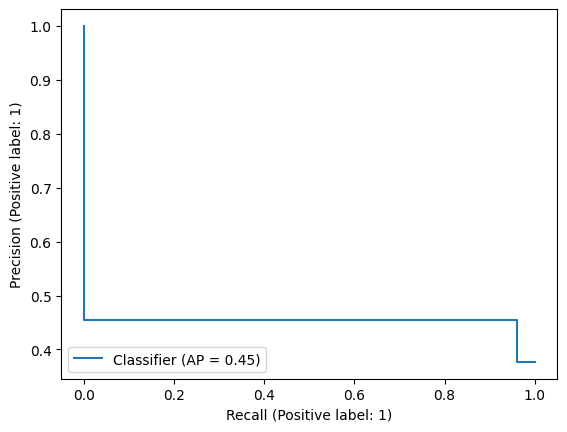

In [54]:
plot = PrecisionRecallDisplay.from_predictions(y_test, custom_pred)
plt.show()

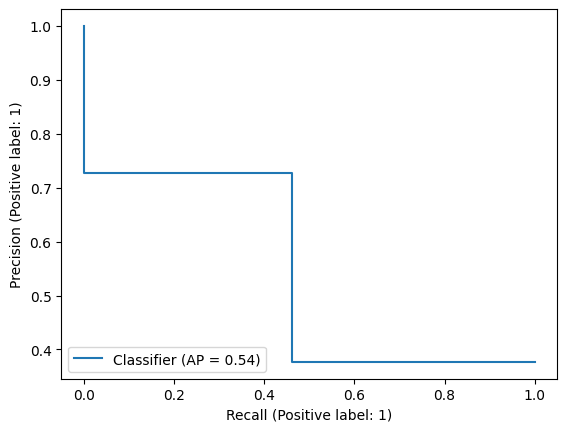

In [55]:
plot = PrecisionRecallDisplay.from_predictions(y_test, pytorch_pred)
plt.show()

TODO: Based on the above curve, calculate the threshold minimizing the absolute difference between precision and recall.

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, sk_pred)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print(f"sk_threshold is {threshold}")

sk_threshold is 1


In [57]:
precision, recall, thresholds = precision_recall_curve(y_test, custom_pred)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print(f"sk_threshold is {threshold}")

sk_threshold is 1


In [58]:
precision, recall, thresholds = precision_recall_curve(y_test, pytorch_pred)
threshold = thresholds[np.argmin(np.abs(precision - recall))]
print(f"sk_threshold is {threshold}")

sk_threshold is 1


# Kaggle Competition

Link: https://www.kaggle.com/t/1013891ffec9479dadd5023e56c04f30